In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
houseprice_df = pd.read_csv('HousePricePrediction.csv')

In [3]:
houseprice_df.shape

(2919, 13)

In [4]:
houseprice_df.head(5)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [5]:
houseprice_df.drop_duplicates(inplace=True)

In [6]:
houseprice_df.shape

(2919, 13)

In [7]:
houseprice_df.head(3)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0


In [8]:
houseprice_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(houseprice_df[['SalePrice']])

SimpleImputer()

In [10]:
imputer.statistics_

array([180921.19589041])

In [11]:
houseprice_df['SalePrice'] = imputer.transform(houseprice_df[['SalePrice']])

In [12]:
houseprice_df.isna().sum()

Id              0
MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [13]:
houseprice_df = houseprice_df.fillna(0)

In [14]:
houseprice_df.isna().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [15]:
houseprice_df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.565262,1051.417266,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.179104,441.120498,56174.332503
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,163000.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.000000,180921.195890
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,180921.195890
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
sns.set_style('darkgrid')

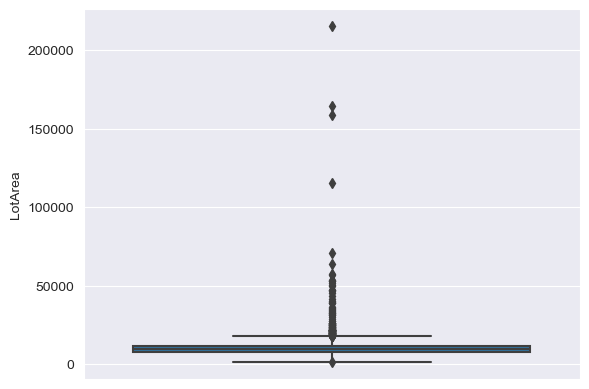

In [18]:
sns.boxplot(houseprice_df, y = 'LotArea');

In [19]:
import numpy as np

In [20]:
Q1 = np.percentile(houseprice_df['LotArea'], 25, interpolation = 'midpoint')
Q3 = np.percentile(houseprice_df['LotArea'], 75, interpolation = 'midpoint')


In [21]:
IQR = Q3 - Q1

In [22]:
lowerbound = Q1 - 1.5 * IQR
upperbound = Q1 + 1.5 * IQR

In [23]:
houseprice_df = houseprice_df[(houseprice_df.LotArea < upperbound) & (houseprice_df.LotArea > lowerbound)]

In [24]:
houseprice_df.shape

(2550, 13)

In [25]:
houseprice_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2550 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2550 non-null   int64  
 1   MSSubClass    2550 non-null   int64  
 2   MSZoning      2550 non-null   object 
 3   LotArea       2550 non-null   int64  
 4   LotConfig     2550 non-null   object 
 5   BldgType      2550 non-null   object 
 6   OverallCond   2550 non-null   int64  
 7   YearBuilt     2550 non-null   int64  
 8   YearRemodAdd  2550 non-null   int64  
 9   Exterior1st   2550 non-null   object 
 10  BsmtFinSF2    2550 non-null   float64
 11  TotalBsmtSF   2550 non-null   float64
 12  SalePrice     2550 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 278.9+ KB


In [26]:
houseprice_df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2913,160,RM,1526,Inside,Twnhs,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589


In [27]:
cat_col = houseprice_df.select_dtypes('object').columns.tolist()

In [28]:
cat_col

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [29]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoder.fit(houseprice_df[cat_col])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [30]:
encoded_cols = encoder.get_feature_names_out(cat_col)

In [31]:
encoded_cols

array(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'Exterior1st_AsbShng',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing'], dtype=object)

In [32]:
houseprice_df[encoded_cols] = encoder.transform(houseprice_df[cat_col])

In [33]:
houseprice_df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2913,160,RM,1526,Inside,Twnhs,5,1970,1970,CemntBd,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
houseprice_df.drop(columns = cat_col, inplace = True)

In [35]:
houseprice_df

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),...,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0,60,8450,5,2003,2003,0.0,856.0,208500.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,20,9600,8,1976,1976,0.0,1262.0,181500.00000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,60,11250,5,2001,2002,0.0,920.0,223500.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,70,9550,5,1915,1970,0.0,756.0,140000.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,6,20,10084,5,2004,2005,0.0,1686.0,307000.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2913,160,1526,5,1970,1970,0.0,546.0,180921.19589,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914,2914,160,1936,7,1970,1970,0.0,546.0,180921.19589,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,2915,160,1894,5,1970,1970,0.0,546.0,180921.19589,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,2917,85,10441,5,1992,1992,0.0,912.0,180921.19589,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
houseprice_df.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior1st_WdShing'],
      dtype='object')

In [37]:
x = houseprice_df.drop(columns = 'SalePrice')
y = houseprice_df['SalePrice']

In [38]:
x

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0,60,8450,5,2003,2003,0.0,856.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,20,9600,8,1976,1976,0.0,1262.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,60,11250,5,2001,2002,0.0,920.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,70,9550,5,1915,1970,0.0,756.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,6,20,10084,5,2004,2005,0.0,1686.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2913,160,1526,5,1970,1970,0.0,546.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914,2914,160,1936,7,1970,1970,0.0,546.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,2915,160,1894,5,1970,1970,0.0,546.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,2917,85,10441,5,1992,1992,0.0,912.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [40]:
x[:] = scaler.transform(x)

In [41]:
x

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.000000,0.235294,0.574722,0.500,0.949275,0.883333,0.0,0.266999,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000343,0.000000,0.669411,0.875,0.753623,0.433333,0.0,0.393637,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000685,0.235294,0.805270,0.500,0.934783,0.866667,0.0,0.286962,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.001028,0.294118,0.665294,0.500,0.311594,0.333333,0.0,0.235808,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.002056,0.000000,0.709263,0.500,0.956522,0.916667,0.0,0.525889,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,0.998286,0.823529,0.004611,0.500,0.710145,0.333333,0.0,0.170306,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914,0.998629,0.823529,0.038370,0.750,0.710145,0.333333,0.0,0.170306,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,0.998972,0.823529,0.034911,0.500,0.710145,0.333333,0.0,0.170306,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,0.999657,0.382353,0.738658,0.500,0.869565,0.700000,0.0,0.284467,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [43]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2040, 37), (510, 37), (2040,), (510,))

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(x_test)

In [46]:
y_test[:5]

67      226000.00000
226     290000.00000
2546    180921.19589
268     120500.00000
2174    180921.19589
Name: SalePrice, dtype: float64

In [47]:
y_pred[:5]

array([198528., 194944., 180096., 130944., 214912.])

In [48]:
from sklearn.metrics import mean_absolute_error

In [49]:
mean_absolute_error(y_test, y_pred)

28995.11514101531

In [50]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 50, max_iter = 100, tol = 0.1)
lasso_model.fit(x_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [51]:
lasso_pred = lasso_model.predict(x_test)

In [52]:
mean_absolute_error(y_test, lasso_pred)

29027.91813483243

In [53]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 50, max_iter =100, tol = 0.1)
ridge_model.fit(x_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [54]:
ridge_pred = ridge_model.predict(x_test)

In [55]:
mean_absolute_error(y_test, ridge_pred)

29177.544832282005